# Generated Data Division and Exploration

**Authors:** Matías Arévalo, Pilar Guerrero, Moritz Goebbels, Tomás Lock, Allan Stalker  
**Date:** January – May 2025  

## Purpose
In this notebook, we use the dataset that has both generated and original data merged together to divide them into `train`, `test`, and `validation` sets. These sets are included in the repository under the `generated_data/` folder within the folder this notebook is located to make running codes easier.

In order for this notebook to work, the following files must be located in the `data/` folder, otherwise, file paths must be updated.

## Import Libraries

In [32]:
import os
import re
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Loading Data

In [33]:
df_merged = pd.read_csv('/content/merged_data.csv')
df_merged.head()

,temperature,label,message
0,0.5,spam,i have been seeing post everywhere and i final...
1,0.5,spam,𝙄 𝚠𝚊𝚜 𝚌𝚘𝚗𝚟𝚒𝚗𝚌𝚎𝚍 𝚝𝚑𝚊𝚝 𝙸 𝚠𝚊𝚜 𝚔𝚎𝚎𝚙𝚝 𝚋𝚞𝚛𝚗𝚒𝚗𝚐 𝚕𝚘𝚜𝚝 ...
2,0.5,spam,𝐈 𝐜𝐚𝐧𝐭 𝐞𝐱𝐩𝐥𝐚𝐢𝐧 𝐡𝐨𝐰 𝐈 𝐟𝐞𝐞𝐥 𝐛𝐮𝐭 𝐢 𝐝𝐨 𝐤𝐧𝐨𝐰 𝐦𝐲 𝐬𝐞𝐜...
3,0.5,spam,i invested money and i got money in return...
4,0.5,spam,𝐈 𝐝𝐨𝐧 𝐭 𝐡𝐚𝐯𝐞 𝐛𝐞𝐞𝐧 𝐬𝐮𝐜𝐜𝐞𝐬𝐬𝐟𝐮𝐥 𝐰𝐢𝐭𝐡 𝐦𝐲 𝐢𝐧𝐯𝐞𝐬𝐭𝐦𝐞...


In [34]:
df_prompt = pd.read_csv('/content/prompt_for_generation.csv')
df_prompt.head()

,label,clean_message,prompt
0,spam,free entry in 2 a wkly comp to win fa cup fina...,Generate a prompt targeting individuals intere...
1,spam,freemsg hey there darling it s been 3 week s...,Generate a prompt that targets individuals see...
2,spam,winner!! as a valued network customer you have...,Generate a prompt targeting individuals who ha...
3,spam,had your mobile num months or more? u r enti...,Generate a prompt targeting individuals who ha...
4,spam,"six chances to win cash! from num to num ,...",Generate a prompt for a text message promotion...


## Data Exploration

Dataset Shape

In [35]:
df_merged.shape

(34962, 3)

In [36]:
df_prompt.shape

(8049, 3)

Spam and Ham message distribution

In [37]:
label_counts = df_merged['label'].value_counts()
print(label_counts)

label
ham     20429
spam    14533
Name: count, dtype: int64


In [38]:
label_counts = df_prompt['label'].value_counts()
print(label_counts)

label
spam    8049
Name: count, dtype: int64


In [39]:
df_merged['label'].value_counts(normalize=True) * 100

,proportion
label,
ham,58.432012
spam,41.567988


Plotting Common Words

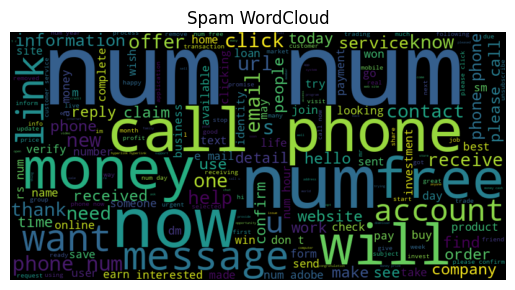

In [40]:
spam_words = ' '.join(df_merged[df_merged['label']=='spam']['message']).lower().split()
ham_words = ' '.join(df_merged[df_merged['label']=='ham']['message']).lower().split()

wordcloud = WordCloud(width=800, height=400).generate(' '.join(spam_words)) # Assign the result to a variable
plt.title("Spam WordCloud")
plt.imshow(wordcloud.to_array(), interpolation='bilinear') # Use the 'to_array' method to get the image array
plt.axis('off')
plt.show()

In [17]:
Counter(spam_words).most_common(20)

[('num', 16297),
 ('to', 15339),
 ('the', 10712),
 ('you', 10310),
 ('your', 8976),
 ('and', 7444),
 ('a', 7269),
 ('for', 6230),
 ('of', 5673),
 ('phone', 5446),
 ('is', 5424),
 ('i', 4694),
 ('in', 4625),
 ('this', 4378),
 ('money', 3458),
 ('on', 3359),
 ('we', 3185),
 ('have', 3078),
 ('with', 3072),
 ('are', 3041)]

Checking special characters

In [41]:
df_merged['has_link'] = df_merged['message'].apply(lambda x: bool(re.search(r'http[s]?://', x)))
df_merged['has_emoji'] = df_merged['message'].apply(lambda x: bool(re.search(r'[^\w\s,]', x)))

In [42]:
df_merged

,temperature,label,message,has_link,has_emoji
0,0.5,spam,i have been seeing post everywhere and i final...,False,False
1,0.5,spam,𝙄 𝚠𝚊𝚜 𝚌𝚘𝚗𝚟𝚒𝚗𝚌𝚎𝚍 𝚝𝚑𝚊𝚝 𝙸 𝚠𝚊𝚜 𝚔𝚎𝚎𝚙𝚝 𝚋𝚞𝚛𝚗𝚒𝚗𝚐 𝚕𝚘𝚜𝚝 ...,False,True
2,0.5,spam,𝐈 𝐜𝐚𝐧𝐭 𝐞𝐱𝐩𝐥𝐚𝐢𝐧 𝐡𝐨𝐰 𝐈 𝐟𝐞𝐞𝐥 𝐛𝐮𝐭 𝐢 𝐝𝐨 𝐤𝐧𝐨𝐰 𝐦𝐲 𝐬𝐞𝐜...,False,False
3,0.5,spam,i invested money and i got money in return...,False,False
4,0.5,spam,𝐈 𝐝𝐨𝐧 𝐭 𝐡𝐚𝐯𝐞 𝐛𝐞𝐞𝐧 𝐬𝐮𝐜𝐜𝐞𝐬𝐬𝐟𝐮𝐥 𝐰𝐢𝐭𝐡 𝐦𝐲 𝐢𝐧𝐯𝐞𝐬𝐭𝐦𝐞...,False,True
...,...,...,...,...,...
34957,NaN,ham,your opinion about me? 1. over 2. jada 3. kusr...,False,True
34958,NaN,ham,i will reach ur home in [emoji] num [emoji] mi...,False,True
34959,NaN,ham,good morning my dear........... have a great d...,False,True
34960,NaN,ham,"as i entered my cabin my pa said, [emoji] [emo...",False,True


In [20]:
link_counts = df_merged.groupby('label')['has_link'].sum()
emoji_counts = df_merged.groupby('label')['has_emoji'].sum()

summary_df = pd.DataFrame({
    'Links': link_counts,
    'Emojis/Special': emoji_counts
}).reset_index()

In [21]:
summary_df

,label,Links,Emojis/Special
0,ham,0,12151
1,spam,3,5814


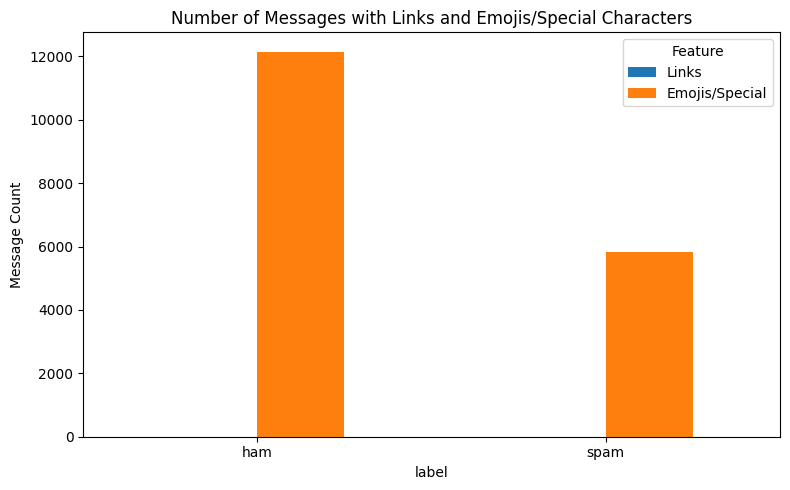

In [22]:
summary_df.set_index('label').plot(kind='bar', figsize=(8,5))
plt.title('Number of Messages with Links and Emojis/Special Characters')
plt.ylabel('Message Count')
plt.xticks(rotation=0)
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

## Data Preprocessing

In [43]:
df = df_merged.drop(columns=['has_link', 'has_emoji'])
df = df.drop(columns=['temperature'])
df

,label,message
0,spam,i have been seeing post everywhere and i final...
1,spam,𝙄 𝚠𝚊𝚜 𝚌𝚘𝚗𝚟𝚒𝚗𝚌𝚎𝚍 𝚝𝚑𝚊𝚝 𝙸 𝚠𝚊𝚜 𝚔𝚎𝚎𝚙𝚝 𝚋𝚞𝚛𝚗𝚒𝚗𝚐 𝚕𝚘𝚜𝚝 ...
2,spam,𝐈 𝐜𝐚𝐧𝐭 𝐞𝐱𝐩𝐥𝐚𝐢𝐧 𝐡𝐨𝐰 𝐈 𝐟𝐞𝐞𝐥 𝐛𝐮𝐭 𝐢 𝐝𝐨 𝐤𝐧𝐨𝐰 𝐦𝐲 𝐬𝐞𝐜...
3,spam,i invested money and i got money in return...
4,spam,𝐈 𝐝𝐨𝐧 𝐭 𝐡𝐚𝐯𝐞 𝐛𝐞𝐞𝐧 𝐬𝐮𝐜𝐜𝐞𝐬𝐬𝐟𝐮𝐥 𝐰𝐢𝐭𝐡 𝐦𝐲 𝐢𝐧𝐯𝐞𝐬𝐭𝐦𝐞...
...,...,...
34957,ham,your opinion about me? 1. over 2. jada 3. kusr...
34958,ham,i will reach ur home in [emoji] num [emoji] mi...
34959,ham,good morning my dear........... have a great d...
34960,ham,"as i entered my cabin my pa said, [emoji] [emo..."


In [44]:
def preprocess_for_roberta(text):
    text = str(text)
    text = re.sub(r'http\S+|www\.\S+', '__URL__', text)
    text = re.sub(r'\S+@\S+', '__EMAIL__', text)
    text = re.sub(r'\b\d+\b', '__NUMBER__', text)
    text = re.sub(r'@\w+', '__USER__', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_message'] = df['message'].astype(str).apply(preprocess_for_roberta)

In [45]:
df

,label,message,clean_message
0,spam,i have been seeing post everywhere and i final...,i have been seeing post everywhere and i final...
1,spam,𝙄 𝚠𝚊𝚜 𝚌𝚘𝚗𝚟𝚒𝚗𝚌𝚎𝚍 𝚝𝚑𝚊𝚝 𝙸 𝚠𝚊𝚜 𝚔𝚎𝚎𝚙𝚝 𝚋𝚞𝚛𝚗𝚒𝚗𝚐 𝚕𝚘𝚜𝚝 ...,𝙄 𝚠𝚊𝚜 𝚌𝚘𝚗𝚟𝚒𝚗𝚌𝚎𝚍 𝚝𝚑𝚊𝚝 𝙸 𝚠𝚊𝚜 𝚔𝚎𝚎𝚙𝚝 𝚋𝚞𝚛𝚗𝚒𝚗𝚐 𝚕𝚘𝚜𝚝 ...
2,spam,𝐈 𝐜𝐚𝐧𝐭 𝐞𝐱𝐩𝐥𝐚𝐢𝐧 𝐡𝐨𝐰 𝐈 𝐟𝐞𝐞𝐥 𝐛𝐮𝐭 𝐢 𝐝𝐨 𝐤𝐧𝐨𝐰 𝐦𝐲 𝐬𝐞𝐜...,𝐈 𝐜𝐚𝐧𝐭 𝐞𝐱𝐩𝐥𝐚𝐢𝐧 𝐡𝐨𝐰 𝐈 𝐟𝐞𝐞𝐥 𝐛𝐮𝐭 𝐢 𝐝𝐨 𝐤𝐧𝐨𝐰 𝐦𝐲 𝐬𝐞𝐜...
3,spam,i invested money and i got money in return...,i invested money and i got money in return wit...
4,spam,𝐈 𝐝𝐨𝐧 𝐭 𝐡𝐚𝐯𝐞 𝐛𝐞𝐞𝐧 𝐬𝐮𝐜𝐜𝐞𝐬𝐬𝐟𝐮𝐥 𝐰𝐢𝐭𝐡 𝐦𝐲 𝐢𝐧𝐯𝐞𝐬𝐭𝐦𝐞...,𝐈 𝐝𝐨𝐧 𝐭 𝐡𝐚𝐯𝐞 𝐛𝐞𝐞𝐧 𝐬𝐮𝐜𝐜𝐞𝐬𝐬𝐟𝐮𝐥 𝐰𝐢𝐭𝐡 𝐦𝐲 𝐢𝐧𝐯𝐞𝐬𝐭𝐦𝐞𝐧...
...,...,...,...
34957,ham,your opinion about me? 1. over 2. jada 3. kusr...,your opinion about me? __NUMBER__. over __NUMB...
34958,ham,i will reach ur home in [emoji] num [emoji] mi...,i will reach ur home in [emoji] num [emoji] mi...
34959,ham,good morning my dear........... have a great d...,good morning my dear........... have a great d...
34960,ham,"as i entered my cabin my pa said, [emoji] [emo...","as i entered my cabin my pa said, [emoji] [emo..."


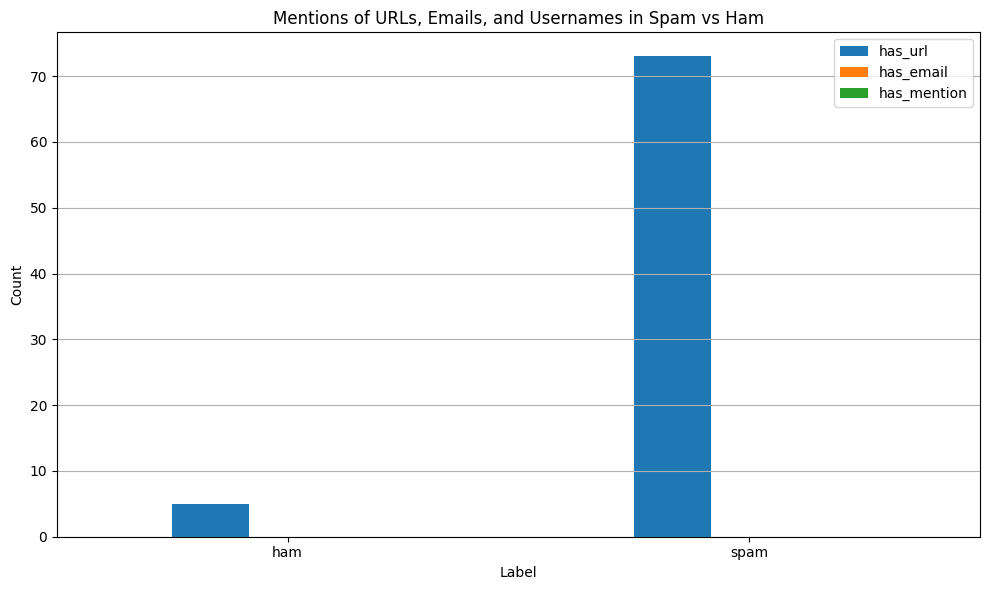

In [46]:
df['has_url'] = df['message'].str.contains(r'http\S+|www\.\S+', regex=True)
df['has_email'] = df['message'].str.contains(r'\S+@\S+', regex=True)
df['has_mention'] = df['message'].str.contains(r'@\w+', regex=True)
mention_stats = df.groupby('label')[['has_url', 'has_email', 'has_mention']].sum()
mention_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Mentions of URLs, Emails, and Usernames in Spam vs Ham')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [47]:
df[['label', 'message', 'clean_message']].sample(10)

,label,message,clean_message
6112,spam,a message for you grandparent,a message for you grandparent
29500,ham,a cute thought for friendship its not necessar...,a cute thought for friendship its not necessar...
7349,spam,you are a winner u have been specially selecte...,you are a winner u have been specially selecte...
28348,ham,getting tickets 4 walsall tue 6 th march my ma...,getting tickets __NUMBER__ walsall tue __NUMBE...
5640,spam,message target person with targeted website url,message target person with targeted website url
10712,spam,सभ free fire players क म ल ग free dj al...,सभ free fire players क म ल ग free dj alok free...
4480,spam,as a student you can get num to num schola...,as a student you can get num to num scholarshi...
8472,spam,econommize more hello welcome to pharm crested...,econommize more hello welcome to pharm crested...
28778,ham,tell dear what happen to you why you talking t...,tell dear what happen to you why you talking t...
10972,spam,guinness record!world s most pierced women! c...,guinness record!world s most pierced women! ca...


In [48]:
df.to_csv('preprocessed_generated_dataset.csv', index=False)

In [49]:
df = df.drop(columns=['has_mention'])

## Test-Val-Train Split  

All of the following files are included in the repository.

In [50]:
df_temp, df_test = train_test_split(df, test_size=0.15, stratify=df['label'], random_state=42)
df_train, df_val = train_test_split(df_temp, test_size=0.176, stratify=df_temp['label'], random_state=42)
print(f"Train: {len(df_train)}")
print(f"Val: {len(df_val)}")
print(f"Test: {len(df_test)}")

Train: 24486
Val: 5231
Test: 5245


In [51]:
df_train.to_csv('train.csv', index=False)
df_val.to_csv('val.csv', index=False)
df_test.to_csv('test.csv', index=False)